In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [34]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [37]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [38]:
# Display basic information
print("Dataset Shape:", train_data.shape)
print("\nColumn Data Types:\n", train_data.dtypes)

Dataset Shape: (891, 12)

Column Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [39]:
# Check for missing values
missing_values = train_data.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", train_data.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [40]:
# Check for missing values
missing_values = test_data.isnull().sum()
# Display the missing values
print("\nMissing Values:\n", test_data.isnull().sum())


Missing Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [41]:
# Display all columns
pd.set_option('display.max_columns', None)

# Display first few rows
display(train_data.head())

# Summary statistics
display(train_data.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


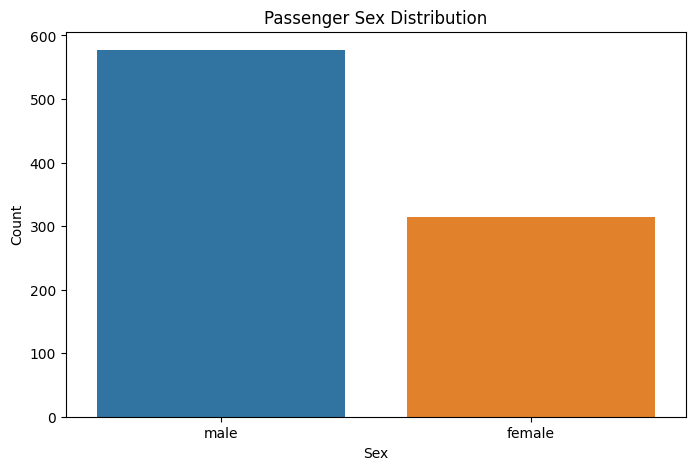

In [42]:
# Plot histogram for Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Sex')
plt.title("Passenger Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

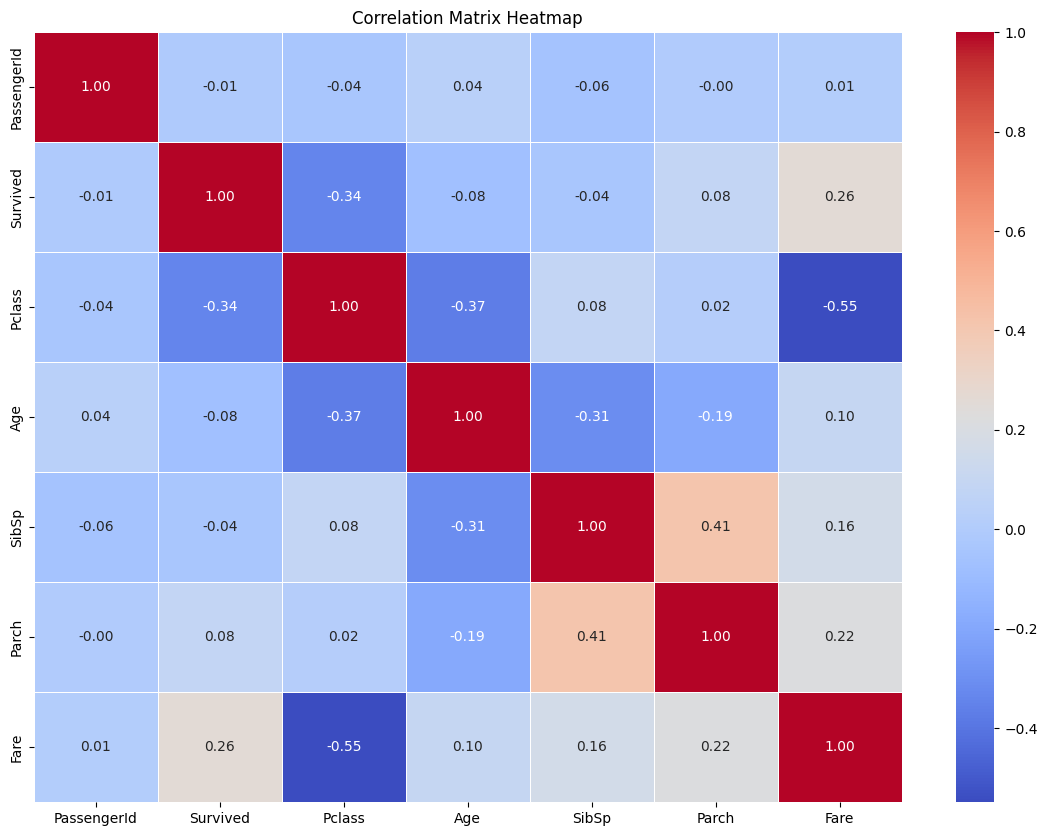

In [43]:
# Compute correlation matrix
correlation_matrix = train_data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [44]:
train_data = train_data.drop(columns = ["Ticket", "Name", "Cabin","PassengerId"] )
test_data_clean = test_data.drop(columns = ["Ticket", "Name", "Cabin","PassengerId"] )

In [45]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S' : 2})

test_data_clean['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data_clean['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S' : 2})

test_data_clean.fillna({'Age': test_data_clean['Age'].mean()}, inplace=True)
test_data_clean.fillna({'Fare': test_data_clean['Fare'].mean()}, inplace=True)



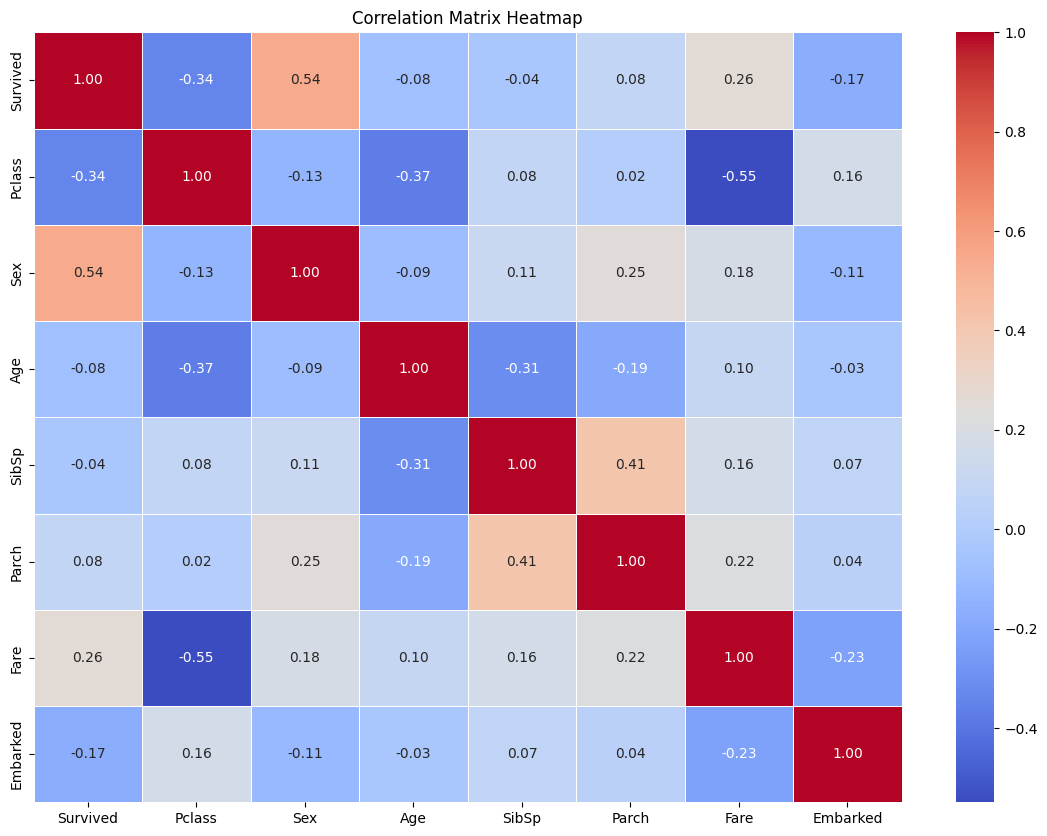

In [46]:
# Compute correlation matrix
correlation_matrix = train_data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [47]:
# Define features and target
X = train_data.drop(columns=["Survived"])
y = train_data["Survived"]
X = X.dropna()
y = y[X.index] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_clf.predict(X_test)

In [49]:
# Evaluate the Decision Tree model
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier Performance:
Accuracy: 0.7336448598130841

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       122
           1       0.73      0.60      0.66        92

    accuracy                           0.73       214
   macro avg       0.73      0.72      0.72       214
weighted avg       0.73      0.73      0.73       214



In [50]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7710280373831776
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       122
           1       0.76      0.68      0.72        92

    accuracy                           0.77       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



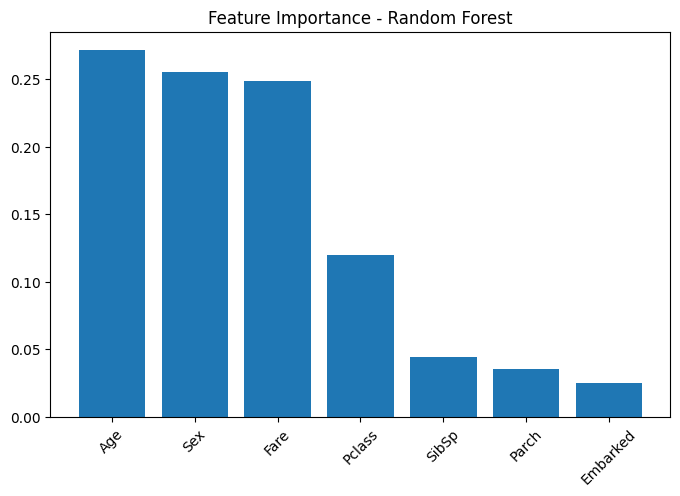

In [51]:
# Get feature importance scores
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.show()

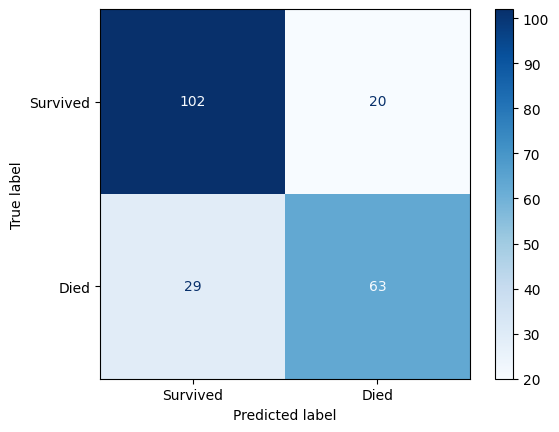

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)

# Visualize
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Died"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 12]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 12, 'n_estimators': 200}
Best score: 0.8194343434343434


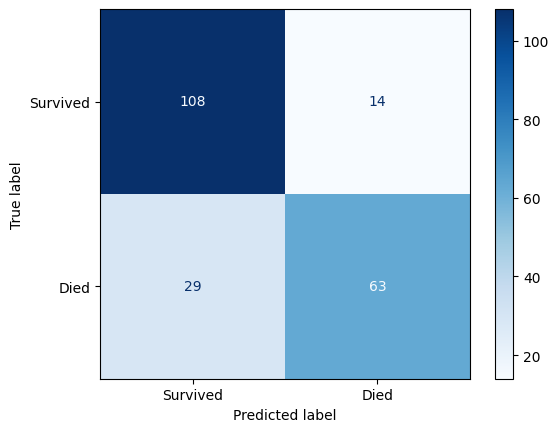

In [54]:
y_pred_rf = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Died"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [57]:
predictions = rf_model.predict(test_data_clean)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [55]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.7523364485981309
              precision    recall  f1-score   support

           0       0.75      0.84      0.80       122
           1       0.75      0.63      0.69        92

    accuracy                           0.75       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.75      0.75      0.75       214



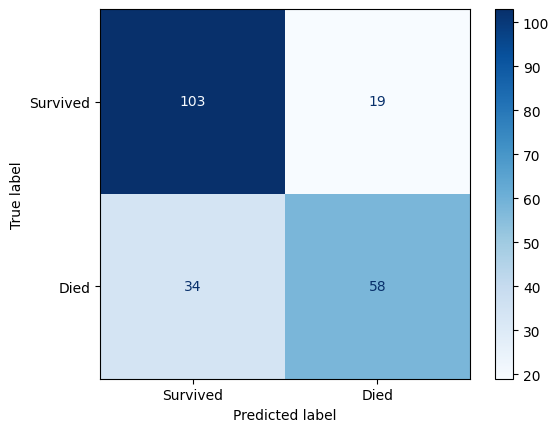

In [56]:
cm = confusion_matrix(y_test, y_pred_svm)

# Visualize
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived", "Died"])
disp.plot(cmap=plt.cm.Blues)
plt.show()